![EDA](src/PORT5.jpg)

# **EDA de los datasets entregados**

*A continuación se realiza un análisis exploratorio usando **visualizaciones** con el fin de entender los datos posterior a su transformación*.

**Nota:** *En este análisis no nos enfocaremos en revisión de datos nulos, faltantes o duplicados, ya que esta etapa la realizamos previamente en cada uno de los ETL de los datasets entregados.*

#### **Importación de librerías** ####
---

*Para este cuaderno usaremos las siguientes librerías: **pandas**, **seaborn** y **matplotlib**.*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### **Extracción de los datos** ####
---

*Procedemos a abrir nuestros archivos limpios y almacenarlos en dataframes para visualizarlos.*

1. *Abrimos el archivo **out_games.parquet** y lo almacenamos en el dataframe **dfGames**.*

In [2]:
dfGames= pd.read_parquet("dataout/out_games.parquet")
dfGames.head(3)

,IdApp,Name,Developer,Publisher,Price,ReleaseYear,ReleaseMonth
0,10,Counter-Strike,Valve,Valve,9.99,2000,11
1,20,Team Fortress Classic,Valve,Valve,4.99,1999,04
2,30,Day of Defeat,Valve,Valve,4.99,2003,05


2. *Abrimos el archivo **out_genres_games** y lo almacenamos en el dataframe **dfGenres**.*

In [3]:
dfGenres= pd.read_parquet("dataout/out_genres_games.parquet")
dfGenres.head(3)

,IdApp,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


3. *Abrimos el archivo **out_users_items** y lo almacenamos en el dataframe **dfUsersItems**.*

In [4]:
dfUsersItems= pd.read_parquet("dataout/out_users_items.parquet")
dfUsersItems.head(3)

,IdUserSteam,IdApp,NameApp,Playtime,PlaytimeLast2W
0,76561197960269200,306660,Ultimate General: Gettysburg,0,0
1,76561197960269200,12150,Max Payne 2: The Fall of Max Payne,0,0
2,76561197960269200,4700,Medieval II: Total War,4,0


4. *Abrimos el archivo **out_users_reviews** y lo almacenamos en el dataframe **dfUsersRev**.*

In [5]:
dfUsersRev= pd.read_parquet("dataout/out_users_reviews.parquet")
dfUsersRev.head(3)

,IdApp,IsRecommend,IsFunny,Comments,PostedMonth,PostedYear
0,10,True,,Good Game :D,April,2012
1,10,True,,One of the best childhood games i have ever pl...,March,2014
2,10,True,,jueguenlooooooo,August,2013


### **Análisis Exploratorio --Games--** ###
---

*Vamos a realizar una **exploración de los datos** (EDA) centrada en las relaciones de los mismos y sus variaciones*

#### **Sobre la distribución de los precios** ####

*Vamos a obtener información sobre las distribuciones de los precios de las aplicaciones, con el fin de saber si existen valroes atípicos.*

1. *Creamos un **stripplot** que nos permite pasar como parametro los precios y establecer los puntos donde se encuentran.*

<Axes: xlabel='Price'>

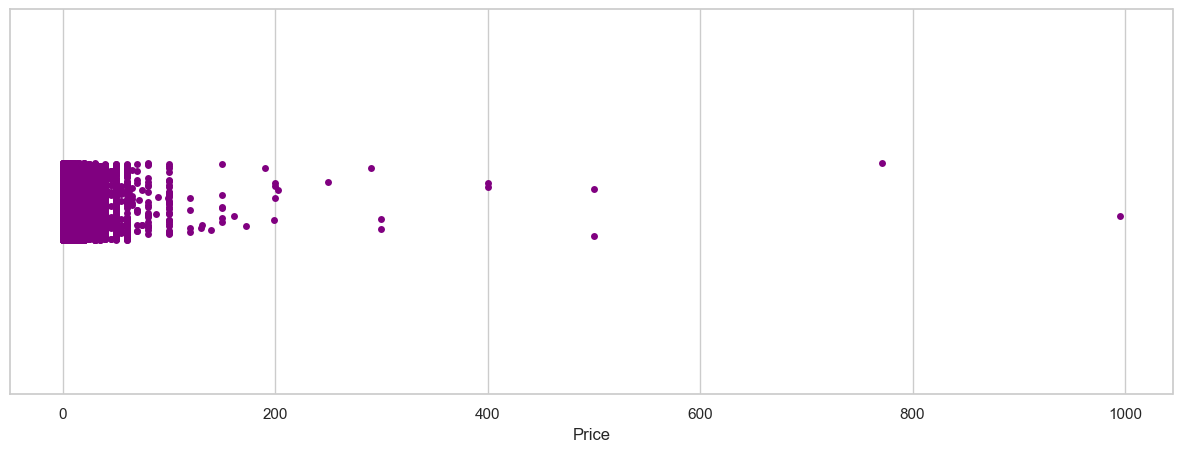

In [98]:
sns.set(style="whitegrid")
# Tamaño del gráfico
plt.figure(figsize=(15, 5))

# Crear el stripplot
sns.stripplot(x="Price", data=dfGames, jitter=True, color="purple")

**Conclusiones**

* Observamos que existen precios que se alejan mucho de los datos más comúnes.
* La mayoría de los precios de las aplicaciones se encuentran entre $0 a $100.

#### **Sobre las apps más costosas** ####

*Vamos a obtener información sobre las aplicaciones de juegos más caras.*

1. *Creamos una Serie que nos muestre el **top 10 de aplicaciones más costosas** en la plataforma de Steam.*
2. *Creamos un **gráfico de barras** que nos muestre el top 10.*

In [19]:
top10MásCostosas = dfGames.sort_values(by="Price", ascending=False).head(10)[["Name", "Price"]]
top10MásCostosas = pd.Series(top10MásCostosas["Price"].values, index=top10MásCostosas["Name"])
top10MásCostosas

Name
Strata Spaces VR – Professional Edition Upgrade        995.00
X-Plane 10 Global - 64 Bit                             771.71
CUR3D Maker Edition - Permission for commercial use    499.99
EVE Online: 15400 PLEX                                 499.99
GameMaker Studio 2 UWP                                 399.99
GameMaker Studio 2 Mobile                              399.99
Clickteam Fusion 2.5 Developer Upgrade                 299.99
MODO indie 10                                          299.99
CopperCube - Professional Edition                      289.99
EVE Online: 7430 PLEX                                  249.99
dtype: float64

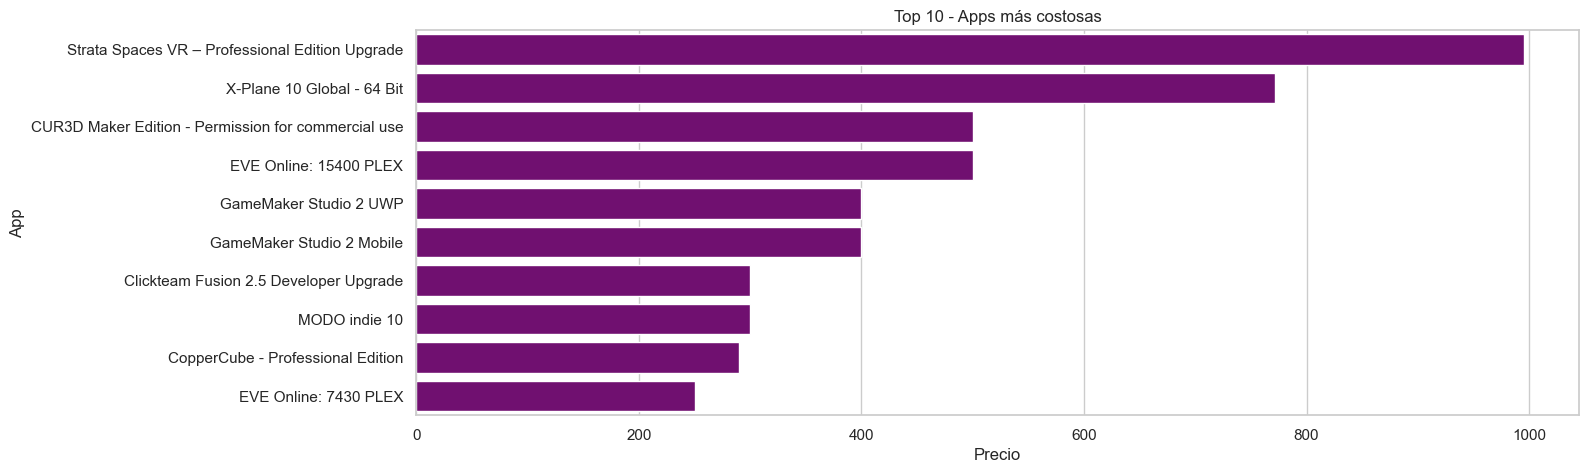

In [25]:
sns.set(style="whitegrid")  # Estilo del gráfico

plt.figure(figsize=(15, 5))  # Tamaño del gráfico
graficoTopApps = sns.barplot(x=top10MásCostosas.values, y=top10MásCostosas.index, color='purple')  # Plot del histograma con kde
plt.title('Top 10 - Apps más costosas')
plt.xlabel('Precio')
plt.ylabel('App') 
plt.show()

In [26]:
# Promedio del precio de una aplicación en Steam.

dfGames.Price.mean()

8.96594345066359

**Conclusiones**

* Se observa que la aplicación más costosa es **Strata Spaces VR**, quizá por lo que usa realidad virtual, superando el promedio de precio de $8.96.
* Las 10 aplicaciones más costosas superan los **$200** en precio.

#### **Sobre los publicadores** ####

*Vamos a obtener información sobre los publicadores de juegos en la plataforma de Steam:*

1. *Creamos una Serie que nos muestre un **conteo del total de juegos** distribuido por publicador.*
2. *.**Filtramos solo los 10 publicadores** con mayor número de juegos.*
3. *Creamos un **gráfico de barras** que nos muestre la cantidad de videojuegos vendidos por publicador.*

In [ ]:
countXPublisher = dfGames["Publisher"].value_counts().head(10)
countXPublisher

Publisher
Ubisoft                       366
Dovetail Games - Trains       358
Degica                        266
Paradox Interactive           262
Dovetail Games - Flight       220
SEGA                          215
Activision                    201
Big Fish Games                194
KOEI TECMO GAMES CO., LTD.    192
KISS ltd                      177
Name: count, dtype: int64

C:\Users\derob\AppData\Local\Temp\ipykernel_21268\2924276519.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graficoPublishers.set_xticklabels(countXPublisher.index, rotation=45, ha='right')


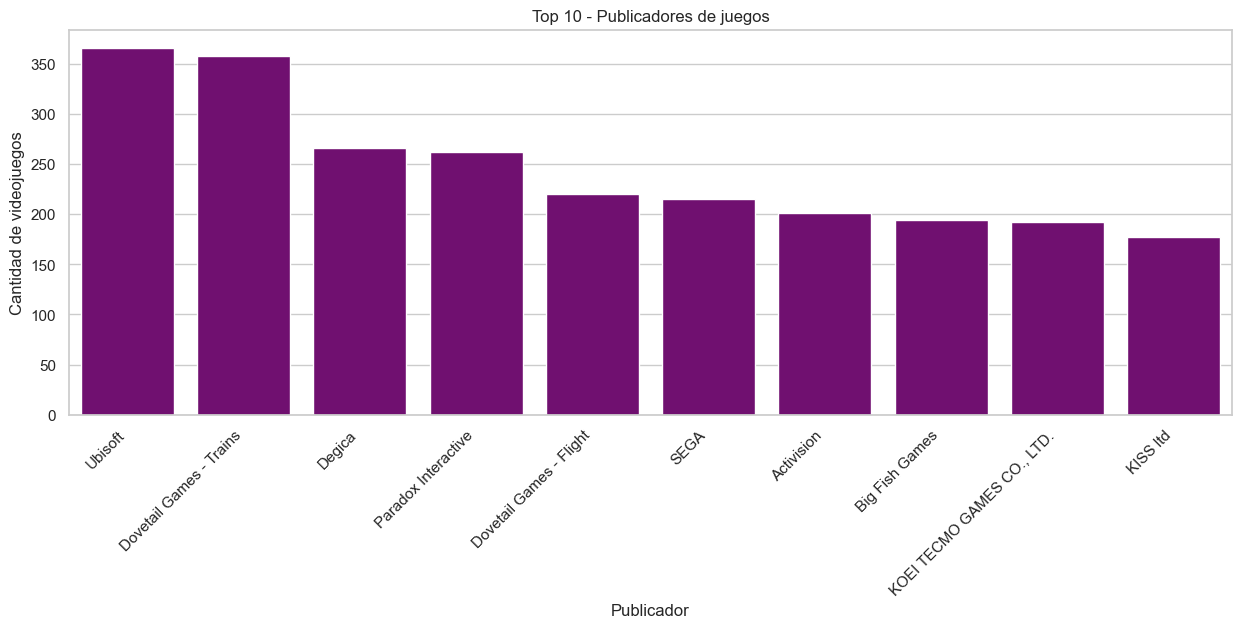

In [ ]:
sns.set(style="whitegrid")  # Estilo del gráfico

plt.figure(figsize=(15, 5))  # Tamaño del gráfico
graficoPublishers = sns.barplot(x=countXPublisher.index, y=countXPublisher.values, color='purple')  # Plot del histograma con kde
graficoPublishers.set_xticklabels(countXPublisher.index, rotation=45, ha='right')
plt.title('Top 10 - Publicadores de juegos')
plt.xlabel('Publicador')
plt.ylabel('Cantidad de videojuegos') 
plt.show()

**Conclusiones**

* Se observa que los desarrrolladores Ubisoft y Dovetail Games son los mayores publicadores de juegos en la plataforma de Steam.
* En promedio el top 10 de publicadores publican alrededor de 200 juegos.

#### **Sobre los desarrolladores** ####

*Vamos a obtener información sobre los desarrolladores de juegos en la plataforma de Steam:*

1. *Creamos una Serie que nos muestre un **conteo del total de juegos** distribuido por desarrollador.*
2. *.**Filtramos solo los 10 desarrolladores** con mayor número de juegos.*
3. *Creamos un **gráfico de barras** que nos muestre la cantidad de videojuegos vendidos por desarrollador.*

In [29]:
countXDev = dfGames["Developer"].value_counts().head(10)
countXDev

Developer
Dovetail Games                                                           253
KOEI TECMO GAMES CO., LTD.                                               180
Ubisoft - San Francisco                                                  178
Capcom                                                                   107
Paradox Development Studio                                                97
Stainless Games                                                           83
DL Softworks                                                              78
Relic Entertainment,Feral Interactive (Mac),Feral Interactive (Linux)     77
Choice of Games                                                           76
SCS Software                                                              73
Name: count, dtype: int64

C:\Users\derob\AppData\Local\Temp\ipykernel_21268\4235100860.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graficoDevelopers.set_xticklabels(countXDev.index, rotation=45, ha='right')


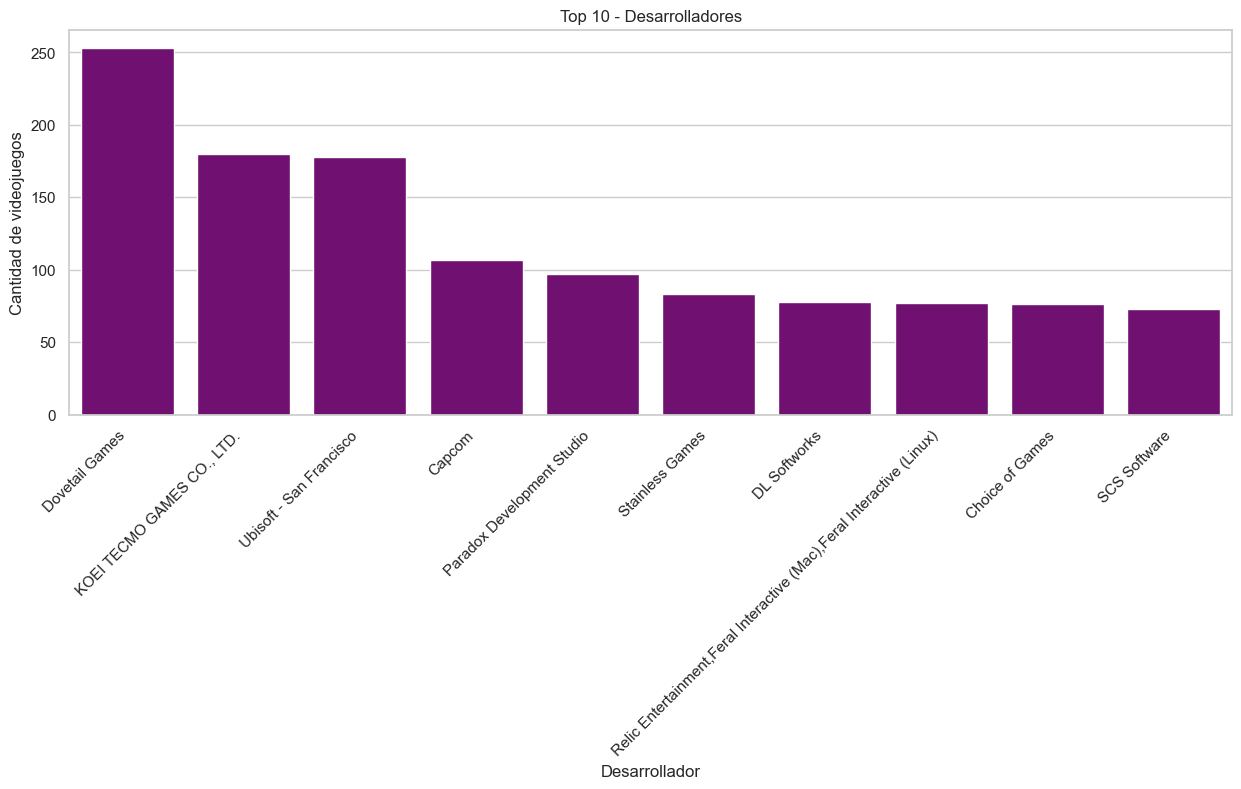

In [30]:
sns.set(style="whitegrid")  # Estilo del gráfico

plt.figure(figsize=(15, 5))  # Tamaño del gráfico
graficoDevelopers = sns.barplot(x=countXDev.index, y=countXDev.values, color='purple')  # Plot del histograma con kde
graficoDevelopers.set_xticklabels(countXDev.index, rotation=45, ha='right')
plt.title('Top 10 - Desarrolladores')
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de videojuegos') 
plt.show()

**Conclusiones**

* Se observa que los desarrrolladores Dovetail Games, KOEI y Ubisoft son los mayores desarrolladores de juegos en la plataforma de Steam.
* En promedio el top 10 de desarrolladores publican alrededor de 100 juegos.

#### **Sobre los años de publicación** ####

*Vamos a obtener información sobre los años en que se han publicado juegos en la plataforma de Steam:*

1. *Creamos una Serie que nos muestre un **conteo del total de juegos** por año de publicación.*
2. *.**Organizamos los años** de mayor a menor.*
3. *Creamos un **gráfico de series** que nos muestre la cantidad de videojuegos publicados por año.*

In [9]:
countXYear = dfGames["ReleaseYear"].value_counts().sort_index()
countXYear.head(3)

ReleaseYear
1983    1
1984    2
1985    1
Name: count, dtype: int64

C:\Users\derob\AppData\Local\Temp\ipykernel_21268\4064761587.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graficoYears.set_xticklabels(countXYear.index, rotation=45, ha='right')


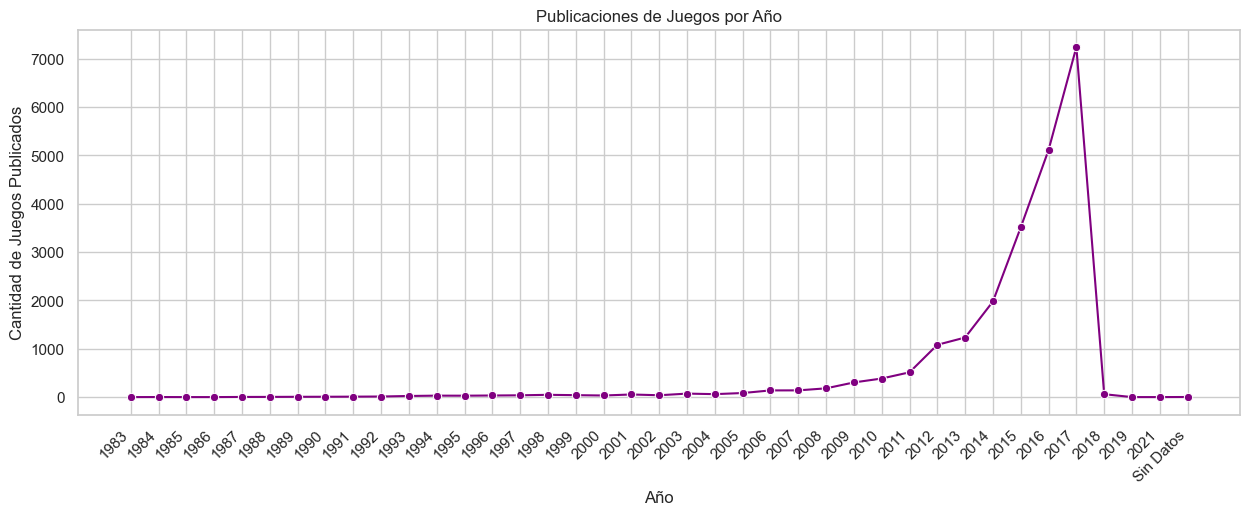

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
graficoYears=sns.lineplot(data=countXYear, marker='o', color='purple')
graficoYears.set_xticklabels(countXYear.index, rotation=45, ha='right')
plt.title('Publicaciones de Juegos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos Publicados')
plt.show()

**Conclusiones**

* Se observa que el año de mayor publicación de videojuegos fue el año **2017** con más de 7000 juegos.
* Se observa una **tendencia de crecimiento** a partir del año 2008 hasta el año 2017.
* Se observa que los años posteriores a 2017 tienen muy pocas publicaciones, posiblemente la **falta de datos** sea un factor de esta tendencia.

#### **Sobre los meses de publicación** ####

*Vamos a obtener información sobre los años en que se han publicado juegos en la plataforma de Steam:*

1. *Creamos una Serie que nos muestre un **conteo del total de juegos** por año de publicación.*
2. *.**Organizamos los años** de mayor a menor.*
3. *Creamos un **gráfico de barras** que nos muestre la cantidad de videojuegos vendidos por publicador.*

In [ ]:
countXMonth = dfGames["ReleaseMonth"].value_counts().sort_index()
countXMonth

ReleaseMonth
01           1376
02           1503
03           1595
04           1588
05           1720
06           1732
07           1913
08           2060
09           2183
10           2434
11           2258
12           2164
Sin Datos       3
Name: count, dtype: int64

C:\Users\derob\AppData\Local\Temp\ipykernel_21268\501812002.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graficoMonths.set_xticklabels(countXMonth.index, rotation=45, ha='right')


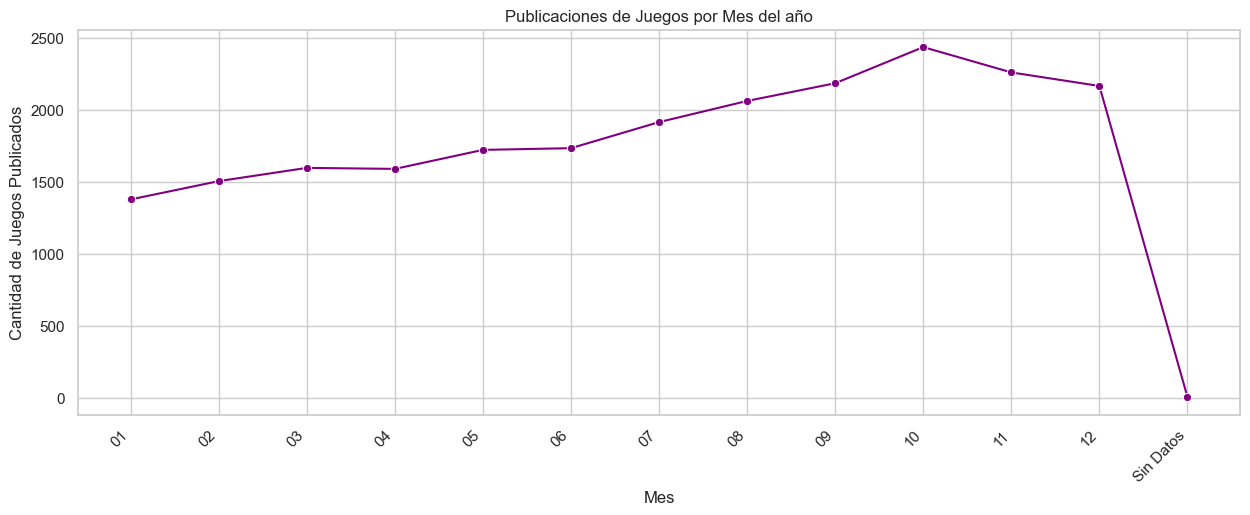

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
graficoMonths=sns.lineplot(data=countXMonth, marker='o', color='purple')
graficoMonths.set_xticklabels(countXMonth.index, rotation=45, ha='right')
plt.title('Publicaciones de Juegos por Mes del año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Juegos Publicados')
plt.show()

**Conclusiones**

* Se observa que en la **segunda mitad del año** es cuando aumenta la publicación de juegos.
* Se observa que el mes de **Octubre** es cuando se publican más juegos al año.

### **Análisis Exploratorio --Genres--** ###
---

*Vamos a realizar una **exploración de los datos** (EDA) centrada en las relaciones de los mismos y sus variaciones.*

#### **Sobre los generos más representados en juegos** ####

*Vamos a obtener información sobre los generos que más tienen aplicaciones en Steam:*

1. *Creamos una Serie que nos muestre un **conteo del total de juegos** por Genero.*
2. *.**Organizamos los generos** de mayor a menor.*
3. *Creamos un **gráfico de barras** que nos muestre la cantidad de videojuegos por categoría.*

In [ ]:
# Seleccionamos todas las filas del dataframe a partir de la segunda columna[indice 1] y las sumamos.
conteo_por_genero = dfGenres.iloc[:, 1:].sum()

# Ordenamos el recuento en orden ascendente.
generosRep = conteo_por_genero.sort_values(ascending=False)

In [ ]:
generosRep

Indie                    12693
Action                    9429
Adventure                 7021
Casual                    6283
Strategy                  5213
Simulation                4724
RPG                       3809
Free to Play              1458
Early Access              1360
Sports                    1032
Racing                     947
Massively Multiplayer      813
Design & Illustration      264
Web Publishing             195
Utilities                  139
Animation & Modeling        83
Education                   53
Software Training           36
Audio Production            30
Video Production            18
Photo Editing               11
dtype: int64

C:\Users\derob\AppData\Local\Temp\ipykernel_21268\481377116.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graficoGenres.set_xticklabels(generosRep.index, rotation=45, ha='right')


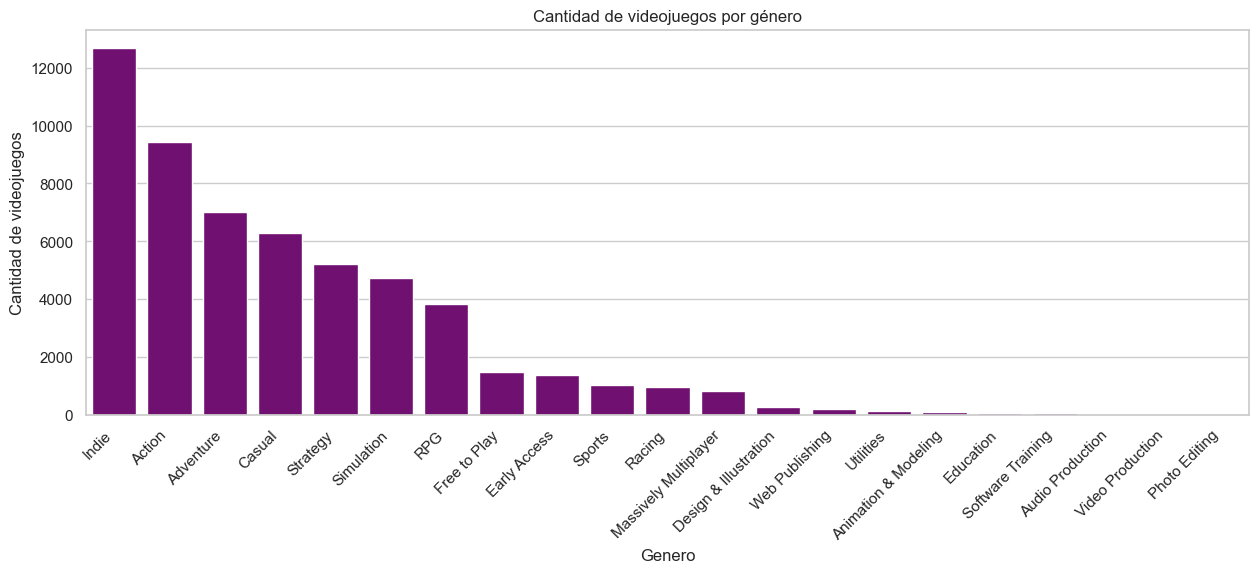

In [ ]:
sns.set(style="whitegrid")  
plt.figure(figsize=(15, 5))
graficoGenres = sns.barplot(x=generosRep.index, y=generosRep.values, color='purple')
graficoGenres.set_xticklabels(generosRep.index, rotation=45, ha='right')
plt.title('Cantidad de videojuegos por género')
plt.xlabel('Genero')
plt.ylabel('Cantidad de videojuegos') 
plt.show()

**Conclusiones**

* Se observa que el genero más representado en la plataforma de Steam es **Indie** con un total de 12.693 juegos.
* Se observa que los generos más representados son **Indie, Action, Adventure, Casual, Strategy, Simulation y RPG** es cuando se publican más juegos al año.
* **Nota:** La cantidad de juegos en este item no coincide con la cantidad de juegos real, debido a la relación de que un juego puede pertener a varios generos.

### **Análisis Exploratorio --UsersItems--** ###
---

*Vamos a realizar una **exploración de los datos** (EDA) centrada en las relaciones de los mismos y sus variaciones.*

#### **Sobre las apps con más horas de juego** ####

*Vamos a obtener información sobre las apps que más horas de juego han tenido, esto nos permite saber que juegos son los más populares*

1. *Creamos una Serie que nos muestre un **promedio de horas jugado** por Videojuego.*
2. *.**Organizamos los generos** de mayor a menor promedio.*
3. *Creamos un **gráfico de barras** que nos muestre la cantidad de horas en promedio por videojuego.*

In [ ]:
horasXApp = dfUsersItems.groupby('NameApp')['Playtime'].mean()
horasXApp = horasXApp.sort_values(ascending=False).head(5)
horasXApp

NameApp
MovieWriterPro                      38283.000000
Major\Minor - EA                    33759.000000
Cosplay Maker                       23717.000000
Casey Powell Lacrosse 16            18798.750000
Counter-Strike: Global Offensive    17936.409608
Name: Playtime, dtype: float64

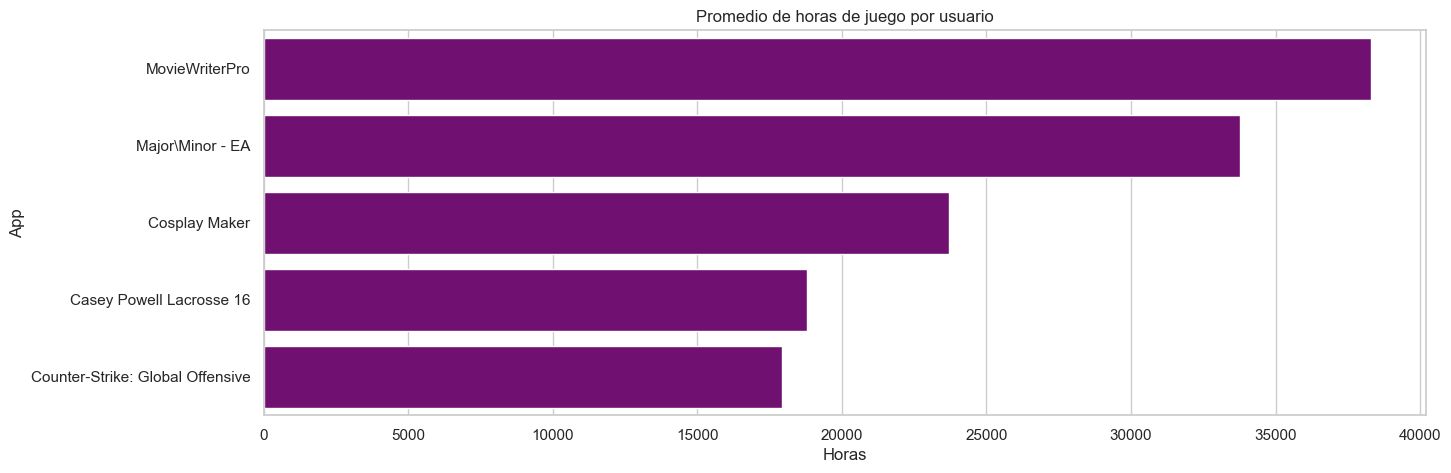

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
graficoTopApps = sns.barplot(x=horasXApp.values, y=horasXApp.index, color='purple')
plt.title('Promedio de horas de juego por usuario')
plt.xlabel('Horas')
plt.ylabel('App') 
plt.show()

**Conclusiones**

* Se observa que la app con mayor promedio de horas por usuario es **MovieWriterPro**.
* Se observa que las apps que representan más horas de interacción con los usuarios son **MovieWriterPro, Major EA, Cosplay Maker, Casey Powell Lacrosse y Counter Strike**.

### **Análisis Exploratorio --UsersReviews--** ###
---

*Vamos a realizar una **exploración de los datos** (EDA) centrada en las relaciones de los mismos y sus variaciones.*

#### **Sobre las apps más recomendadas por los usuarios** ####

*Vamos a obtener información sobre las apps que más recomendaciones han tenido en las reviews de los usuarios:*

1. *Creamos un dataframe con la union de los dataframes **UsersRev y Games**, con el fin de traer la información del nombre de las apps.*
2. *Creamos una Serie que nos agrupe por aplicación el total de **recomendaciones afirmativas**.*
2. *.**Organizamos el top 5** de mayor a menor número de recomendaciones.*
3. *Creamos un **gráfico de barras** que nos muestre la estos datos.*

In [ ]:
dfMerge = pd.merge(dfUsersRev, dfGames, on="IdApp")
dfMerge.drop(columns=["IsFunny", "Comments", "PostedMonth", "PostedYear","Developer", "Publisher","Price", "ReleaseYear", "ReleaseMonth"])

In [ ]:
recomXApp = dfMerge.groupby("Name")["IsRecommend"].apply(lambda x: (x == True).sum())
recomXApp = recomXApp.sort_values(ascending=False).head(5)
recomXApp

C:\Users\derob\AppData\Local\Temp\ipykernel_21268\3177462963.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graficoRecom.set_xticklabels(recomXApp.index, rotation=45, ha='right')


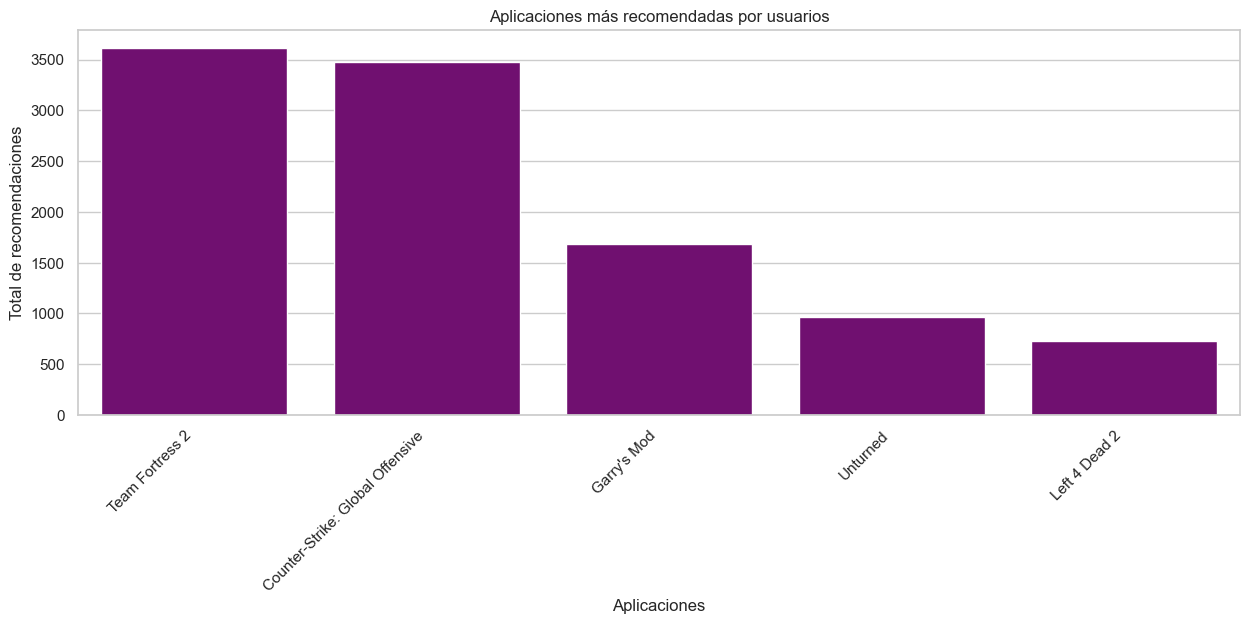

In [ ]:
sns.set(style="whitegrid")  
plt.figure(figsize=(15, 5))
graficoRecom = sns.barplot(x=recomXApp.index, y=recomXApp.values, color='purple')
graficoRecom.set_xticklabels(recomXApp.index, rotation=45, ha='right')
plt.title('Aplicaciones más recomendadas por usuarios')
plt.xlabel('Aplicaciones')
plt.ylabel('Total de recomendaciones') 
plt.show()

**Conclusiones**

* Se observa que las apps más recomendadas por los usuarios son: **Team Fortress 2 y Counter-Strike**
* Estas app cuentan con un total de **750 a 3500** recoemdaciones.

#### **Sobre las apps menos recomendadas por los usuarios** ####

*Vamos a obtener información sobre las apps que mayor número de recomendaciones negativas han tenido en las reviews de los usuarios:*

1. *Usamos el dataframe que creamos anteriormente*
2. *Creamos una Serie que nos agrupe por aplicación el total de **recomendaciones negativas**.*
2. *.**Organizamos el top 5** de mayor a menor número de recomendaciones negativas.*
3. *Creamos un **gráfico de barras** que nos muestre la estos datos.*

In [89]:
noRecomXApp = dfMerge.groupby("Name")["IsRecommend"].apply(lambda x: (x == False).sum())
noRecomXApp = noRecomXApp.sort_values(ascending=False).head(10)
noRecomXApp

Name
Counter-Strike: Global Offensive    281
DayZ                                162
No Man's Sky                        128
Team Fortress 2                     125
Rust                                113
Robocraft                            89
Unturned                             89
ARK: Survival Evolved                72
Heroes & Generals                    67
Call of Duty®: Black Ops III         62
Name: IsRecommend, dtype: int64

C:\Users\derob\AppData\Local\Temp\ipykernel_21268\2735073701.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graficoNoRecom.set_xticklabels(noRecomXApp.index, rotation=45, ha='right')


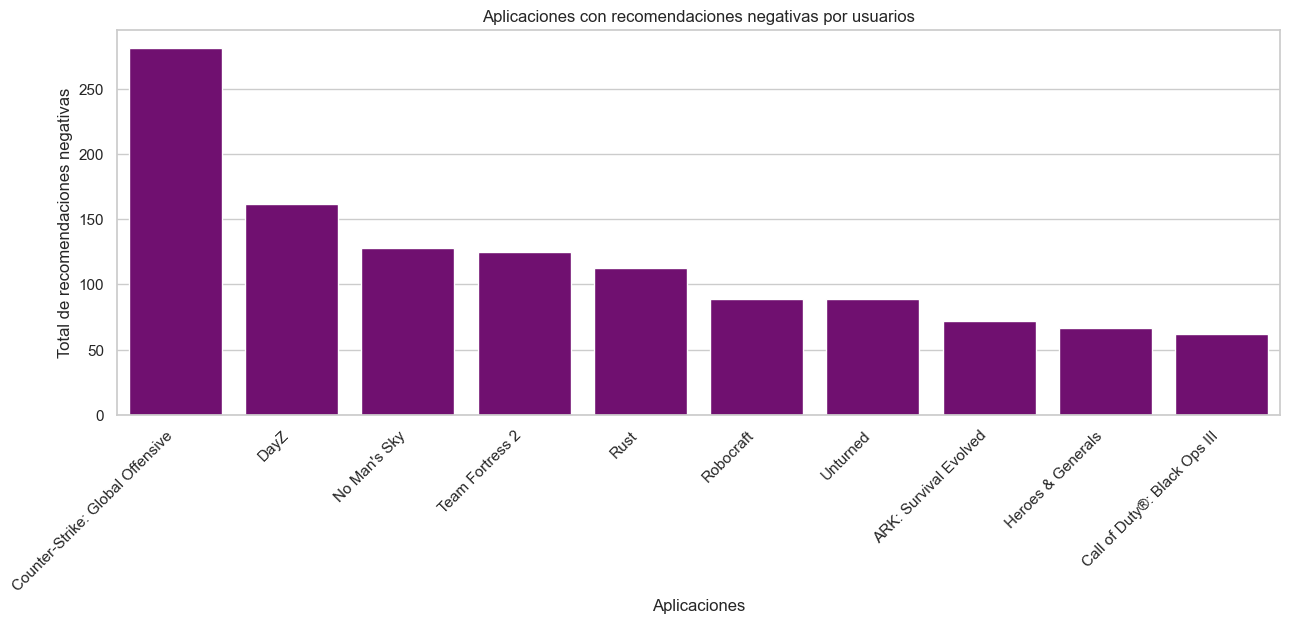

In [91]:
sns.set(style="whitegrid")  
plt.figure(figsize=(15, 5))
graficoNoRecom = sns.barplot(x=noRecomXApp.index, y=noRecomXApp.values, color='purple')
graficoNoRecom.set_xticklabels(noRecomXApp.index, rotation=45, ha='right')
plt.title('Aplicaciones con recomendaciones negativas por usuarios')
plt.xlabel('Aplicaciones')
plt.ylabel('Total de recomendaciones negativas') 
plt.show()

**Conclusiones**

* Se observa que las app con mayor número de recomendaciones negativas por los usuarios es: **Counter-Strike** lo cual es interesante ya que también es una de las apps con mayor numero de recomendaciones positivas.
* Se observa que el promedio de recomendaciones negativas es menor que el número de recomendaciones positivas.